In [1]:
import pandas as pd

with open('pain_predictions', 'r') as f:
    predictions = f.readlines()
    predictions = [x.strip() for x in predictions]
    predictions = [x.split(' ') for x in predictions]
    predictions = pd.DataFrame(predictions)
    predictions['sum'] = predictions.sum(axis=1)
    predictions['sum'].value_counts()

In [2]:
predictions['sum'].value_counts()

sum
100    6600
010    1819
001     930
Name: count, dtype: int64

No Pain
              precision    recall  f1-score   support

           0       0.38      0.85      0.52      1209
           1       0.97      0.79      0.87      8140

    accuracy                           0.80      9349
   macro avg       0.67      0.82      0.70      9349
weighted avg       0.90      0.80      0.83      9349

Mild Pain
              precision    recall  f1-score   support

           0       0.92      0.84      0.87      8238
           1       0.26      0.42      0.32      1111

    accuracy                           0.79      9349
   macro avg       0.59      0.63      0.60      9349
weighted avg       0.84      0.79      0.81      9349

Pain
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      9251
           1       0.07      0.70      0.13        98

    accuracy                           0.90      9349
   macro avg       0.54      0.81      0.54      9349
weighted avg       0.99      0.90      0.94      93

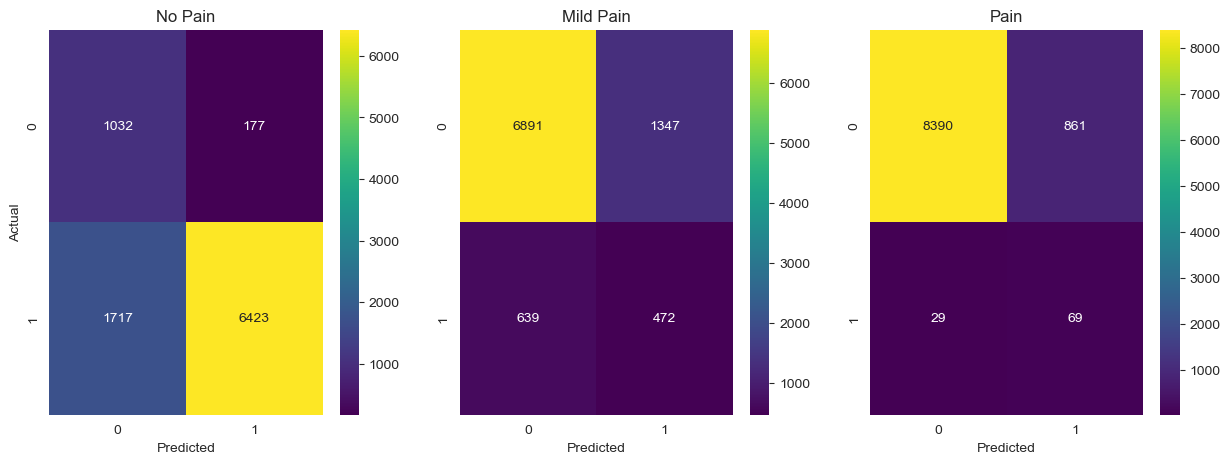

In [3]:
columns = ['No Pain', 'Mild Pain', 'Pain']
with open('pain_predictions', 'r') as pred:
    with open('../data/UNBC/list/UNBC_test_pspi_fold1.txt', 'r') as lab:
        labels = lab.readlines()
        labels = [x.strip() for x in labels]
        labels = [x.split(' ') for x in labels]
        labels = pd.DataFrame(labels, columns=columns)

        predictions = pred.readlines()
        predictions = [x.strip() for x in predictions]
        predictions = [x.split(' ') for x in predictions]
        predictions = pd.DataFrame(predictions, columns=columns)

# print precision, recall, f1-score with classification_report
from sklearn.metrics import classification_report

for i in range(3):
    print(columns[i])
    print(classification_report(labels.iloc[:, i], predictions.iloc[:, i]))

#create confusion matrices with subplots
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax, fig = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    cm = confusion_matrix(labels.iloc[:, i], predictions.iloc[:, i])
    sns.heatmap(cm, annot=True, fmt=".0f", ax=fig[i], cmap="viridis")
    fig[i].set_title(columns[i])
    fig[i].set_xlabel('Predicted')
fig[0].set_ylabel('Actual')

plt.show()

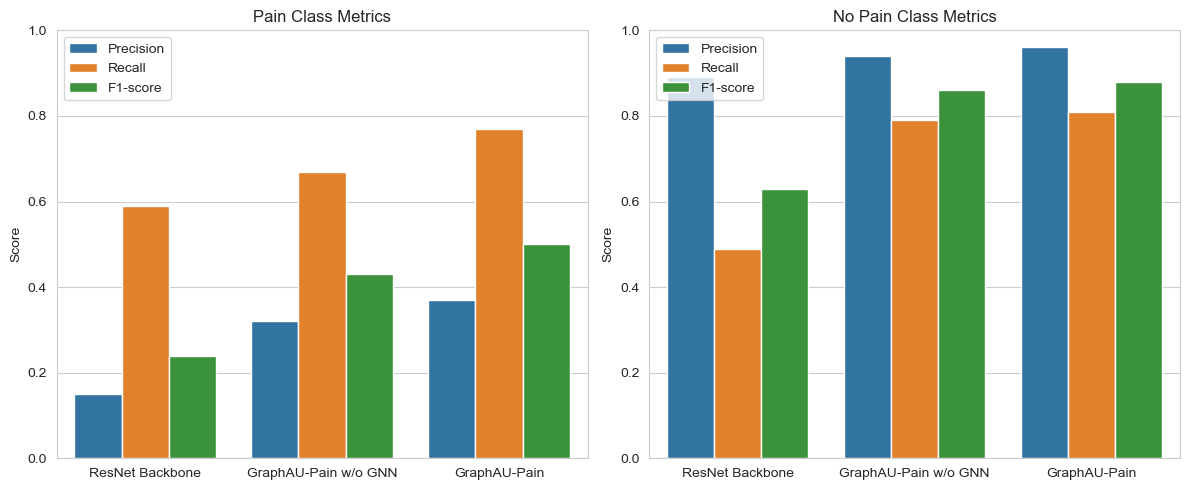

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------
# 1) PREPARE THE DATA
# ------------------------

# Data for the No Pain class (label=0)
no_pain_data = {
    'Model':     ['ResNet Backbone',  'GraphAU-Pain w/o GNN',        'GraphAU-Pain'],
    'Precision': [0.15,             0.32,            0.37],
    'Recall':    [0.59,             0.67,            0.77],
    'F1-score':  [0.24,             0.43,            0.50],
}
df_no_pain = pd.DataFrame(no_pain_data)

# Data for the Pain class (label=1)
pain_data = {
    'Model':     ['ResNet Backbone',  'GraphAU-Pain w/o GNN',        'GraphAU-Pain'],
    'Precision': [0.89,             0.94,            0.96],
    'Recall':    [0.49,             0.79,            0.81],
    'F1-score':  [0.63,             0.86,            0.88],
}
df_pain = pd.DataFrame(pain_data)

# Convert both to "long-form" data for seaborn
df_no_pain_melt = df_no_pain.melt(
    id_vars='Model',
    value_vars=['Precision', 'Recall', 'F1-score'],
    var_name='Metric',
    value_name='Value'
)
df_pain_melt = df_pain.melt(
    id_vars='Model',
    value_vars=['Precision', 'Recall', 'F1-score'],
    var_name='Metric',
    value_name='Value'
)

# ------------------------
# 2) CREATE THE PLOTS
# ------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# --- Plot 1: No Pain class metrics ---
plt.subplot(1, 2, 1)
sns.barplot(data=df_no_pain_melt, x='Model', y='Value', hue='Metric')
plt.title('Pain Class Metrics')
plt.ylim(0, 1.0)
plt.xlabel('')
plt.ylabel('Score')
plt.legend(loc='upper left')

# --- Plot 2: Pain class metrics ---
plt.subplot(1, 2, 2)
sns.barplot(data=df_pain_melt, x='Model', y='Value', hue='Metric')
plt.title('No Pain Class Metrics')
plt.ylim(0, 1.0)
plt.xlabel('')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
